In [10]:
import pandas as pd

# Define dataset path
dataset_path = "/Users/souf/Desktop/CVI_setp_2/data_to_ML_model.csv"

# Load the dataset
df = pd.read_csv(dataset_path)

# Display dataset shape and first few rows
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (32912, 513)


,Returnees reported in the community,Three most common IDP shelter types - Solid finished apartment,Three most common IDP shelter types - Unfinished or abandoned residential building,Three most common IDP shelter types - Damaged residential building,Three most common IDP shelter types - Non residential structure with one family,Three most common IDP shelter types - Collective center with more than one family,Three most common IDP shelter types - Tent,Proportion of IDPs living in overcrowded shelters,IDP shelter inadequacies - Lack of lighting inside shelter,IDP shelter inadequacies - Lack of lighting around shelter,...,Livelihood support,Education,WASH,Winterisation,Legal services,GBV services,CP services,Explosive hazard risk awareness or removal of explosive contamination,Mental health psychological support,Cash assistance vouchers or cash in hand
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Identify assistance columns (target labels)
assistance_columns = [col for col in df.columns if "assistance" in col.lower()]  # Adjust if needed
target = df[assistance_columns]

# Simplify column names for readability
simplified_labels = {col: col.split(" - ")[-1] for col in assistance_columns}
target = target.rename(columns=simplified_labels)

# Features (X) - Drop target columns
df_feature = df.drop(columns=assistance_columns)

# Show the updated column names
print("Feature columns:", df_feature.columns[:10])  # Show first 10 features
print("Target columns:", target.columns)


Feature columns: Index(['Returnees reported in the community',
       'Three most common IDP shelter types - Solid finished apartment',
       'Three most common IDP shelter types - Unfinished or abandoned residential building',
       'Three most common IDP shelter types - Damaged residential building',
       'Three most common IDP shelter types - Non residential structure with one family',
       'Three most common IDP shelter types - Collective center with more than one family',
       'Three most common IDP shelter types - Tent',
       'Proportion of IDPs living in overcrowded shelters',
       'IDP shelter inadequacies - Lack of lighting inside shelter',
       'IDP shelter inadequacies - Lack of lighting around shelter'],
      dtype='object')
Target columns: Index(['Assistance from local councils/NGOs/other groups',
       'Cash or in-kind humanitarian assistance',
       'Sell in-kind humanitarian assistance',
       'Special assistance for vulnerable groups (women living alo

In [12]:
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(df_feature, target, test_size=0.2, random_state=1234)

# Display split shapes
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}, Y_test shape: {Y_test.shape}")


X_train shape: (26329, 504), X_test shape: (6583, 504)
Y_train shape: (26329, 9), Y_test shape: (6583, 9)


In [13]:
# Reshape features to 3D format for CNN
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Verify the new shape
print(f"Reshaped X_train: {X_train.shape}, Reshaped X_test: {X_test.shape}")


Reshaped X_train: (26329, 504, 1), Reshaped X_test: (6583, 504, 1)


In [14]:
# Verify Data Before Training
print("Sample Y_train (first 5 rows):")
print(Y_train.head())

print("Unique values in Y_train:")
print(Y_train.nunique())


Sample Y_train (first 5 rows):
       Assistance from local councils/NGOs/other groups  \
21051                                               0.0   
235                                                 0.0   
26613                                               0.0   
4145                                                0.0   
25285                                               0.0   

       Cash or in-kind humanitarian assistance  \
21051                                      0.0   
235                                        0.0   
26613                                      0.0   
4145                                       0.0   
25285                                      1.0   

       Sell in-kind humanitarian assistance  \
21051                                   0.0   
235                                     0.0   
26613                                   0.0   
4145                                    0.0   
25285                                   1.0   

       Special assistance for 

In [15]:
# One-Hot Encoding for Multi-Class Targets

In [16]:
# Convert Multi-Class Labels to One-Hot Encoding

from sklearn.preprocessing import OneHotEncoder

# Identify non-binary columns
non_binary_cols = [col for col in Y_train.columns if Y_train[col].nunique() > 2]

# Apply One-Hot Encoding only to these columns with unknown category handling
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

# Fit on training data and transform both training & test sets
encoded_train = encoder.fit_transform(Y_train[non_binary_cols])
encoded_test = encoder.transform(Y_test[non_binary_cols])

# Convert back to DataFrame with new column names
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(non_binary_cols))
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(non_binary_cols))

# Drop original non-binary columns & replace with encoded versions
Y_train = Y_train.drop(columns=non_binary_cols).reset_index(drop=True)
Y_test = Y_test.drop(columns=non_binary_cols).reset_index(drop=True)

Y_train = pd.concat([Y_train, encoded_train_df], axis=1)
Y_test = pd.concat([Y_test, encoded_test_df], axis=1)

# Check new label shapes
print(f"Updated Y_train shape: {Y_train.shape}")
print(f"Updated Y_test shape: {Y_test.shape}")


Updated Y_train shape: (26329, 28)
Updated Y_test shape: (6583, 28)


In [17]:
# Define & Train the CNN Model

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, Dense, Dropout

# Verify TensorFlow version
print(tf.__version__)

2.12.0


In [19]:
# Build the CNN Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, Dense, Dropout

# Define input shape
input_dim = X_train.shape[1]

# Build CNN Model for Multi-Label Classification
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_dim, 1)),
    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(Y_train.shape[1], activation='sigmoid')  # Multi-label classification output
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Display model summary
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 502, 64)           256       
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 28)                3612      
                                                                 
Total params: 12,188
Trainable params: 12,188
Non-trainable params: 0
____________________________________________________

In [20]:
# Train the CNN Model

history = cnn_model.fit(
    X_train, Y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, Y_test),
    verbose=1
)


Epoch 1/20


2025-02-24 15:22:12.319316: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


823/823 [==============================] - 2s 3ms/step - loss: 0.2434 - accuracy: 0.6379 - val_loss: 0.2120 - val_accuracy: 0.6872
Epoch 2/20
823/823 [==============================] - 2s 2ms/step - loss: 0.2137 - accuracy: 0.6887 - val_loss: 0.2098 - val_accuracy: 0.6872
Epoch 3/20
823/823 [==============================] - 2s 2ms/step - loss: 0.2099 - accuracy: 0.6890 - val_loss: 0.2040 - val_accuracy: 0.6848
Epoch 4/20
823/823 [==============================] - 2s 2ms/step - loss: 0.2039 - accuracy: 0.6488 - val_loss: 0.2032 - val_accuracy: 0.5818
Epoch 5/20
823/823 [==============================] - 2s 2ms/step - loss: 0.2026 - accuracy: 0.6222 - val_loss: 0.2014 - val_accuracy: 0.6550
Epoch 6/20
823/823 [==============================] - 2s 2ms/step - loss: 0.2022 - accuracy: 0.6239 - val_loss: 0.2006 - val_accuracy: 0.6070
Epoch 7/20
823/823 [==============================] - 2s 2ms/step - loss: 0.2018 - accuracy: 0.6210 - val_loss: 0.2006 - val_accuracy: 0.6448
Epoch 8/20
823/82

In [21]:
#  Evaluate the Model

test_loss, test_accuracy = cnn_model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

206/206 [==============================] - 0s 947us/step - loss: 0.1998 - accuracy: 0.6448
Test Accuracy: 0.6448, Test Loss: 0.1998


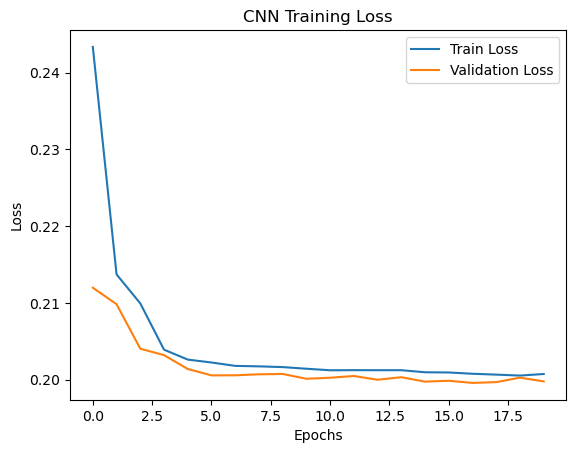

In [22]:
# Visualize Training Progress - training vs. validation loss

import matplotlib.pyplot as plt

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("CNN Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [23]:
# CNN Model - Optimization

In [24]:
# Define Optimized Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define input shape
input_dim = X_train.shape[1]

# Build Optimized CNN Model
optimized_cnn = Sequential([
    Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(input_dim, 1)),
    BatchNormalization(),  # Normalize activations
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    GlobalAveragePooling1D(),
    Dense(256, activation='relu'),
    Dropout(0.4),  # Increase dropout for regularization
    Dense(Y_train.shape[1], activation='sigmoid')  # Multi-label classification output
])

# Compile the model with a lower learning rate
optimized_cnn.compile(optimizer=Adam(learning_rate=0.0005),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

# Display model summary
optimized_cnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 500, 128)          768       
                                                                 
 batch_normalization (BatchN  (None, 500, 128)         512       
 ormalization)                                                   
                                                                 
 conv1d_2 (Conv1D)           (None, 498, 64)           24640     
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 256)               16640     
                                                                 
 dropout_1 (Dropout)         (None, 256)              

In [25]:
# Train the Optimized CNN

history_optimized = optimized_cnn.fit(
    X_train, Y_train,
    epochs=40,  # Increased training time
    batch_size=32,
    validation_data=(X_test, Y_test),
    verbose=1
)


Epoch 1/40
823/823 [==============================] - 19s 23ms/step - loss: 0.2235 - accuracy: 0.5923 - val_loss: 0.1997 - val_accuracy: 0.6599
Epoch 2/40
823/823 [==============================] - 19s 23ms/step - loss: 0.2010 - accuracy: 0.6168 - val_loss: 0.1989 - val_accuracy: 0.5961
Epoch 3/40
823/823 [==============================] - 19s 24ms/step - loss: 0.1981 - accuracy: 0.6211 - val_loss: 0.1961 - val_accuracy: 0.6228
Epoch 4/40
823/823 [==============================] - 19s 23ms/step - loss: 0.1961 - accuracy: 0.6258 - val_loss: 0.1916 - val_accuracy: 0.6529
Epoch 5/40
823/823 [==============================] - 19s 23ms/step - loss: 0.1940 - accuracy: 0.6305 - val_loss: 0.1899 - val_accuracy: 0.6514
Epoch 6/40
823/823 [==============================] - 19s 24ms/step - loss: 0.1923 - accuracy: 0.6329 - val_loss: 0.1895 - val_accuracy: 0.6098
Epoch 7/40
823/823 [==============================] - 19s 23ms/step - loss: 0.1909 - accuracy: 0.6361 - val_loss: 0.1881 - val_accuracy:

In [26]:
#  Evaluate Performance
test_loss_opt, test_accuracy_opt = optimized_cnn.evaluate(X_test, Y_test)
print(f"Optimized Model - Test Accuracy: {test_accuracy_opt:.4f}, Test Loss: {test_loss_opt:.4f}")

206/206 [==============================] - 1s 5ms/step - loss: 0.1714 - accuracy: 0.6444
Optimized Model - Test Accuracy: 0.6444, Test Loss: 0.1714


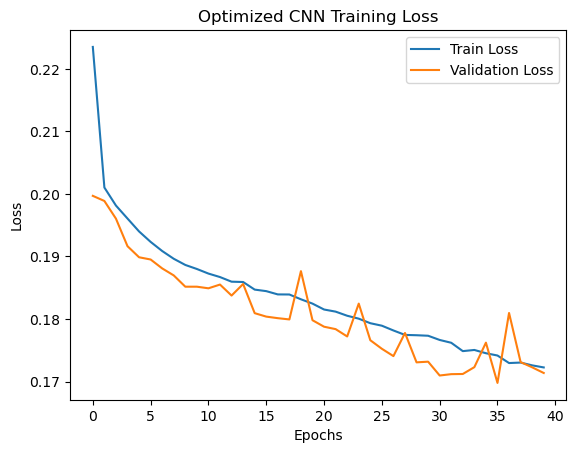

In [27]:
# Plot Training Performance

import matplotlib.pyplot as plt

# Plot loss
plt.plot(history_optimized.history['loss'], label='Train Loss')
plt.plot(history_optimized.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Optimized CNN Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [47]:
from sklearn.metrics import accuracy_score, f1_score, hamming_loss

# Generate predictions for normal CNN
y_pred_cnn = (cnn_model.predict(X_test) > 0.5).astype(int)

# Generate predictions for optimized CNN
y_pred_opt = (optimized_cnn.predict(X_test) > 0.5).astype(int)

# Compute evaluation metrics for normal CNN
accuracy_cnn = accuracy_score(Y_test, y_pred_cnn)
f1_macro_cnn = f1_score(Y_test, y_pred_cnn, average='macro')
f1_micro_cnn = f1_score(Y_test, y_pred_cnn, average='micro')
hamming_loss_cnn = hamming_loss(Y_test, y_pred_cnn)

# Compute evaluation metrics for optimized CNN
accuracy_opt = accuracy_score(Y_test, y_pred_opt)
f1_macro_opt = f1_score(Y_test, y_pred_opt, average='macro')
f1_micro_opt = f1_score(Y_test, y_pred_opt, average='micro')
hamming_loss_opt = hamming_loss(Y_test, y_pred_opt)

# Display results
import pandas as pd
results_df = pd.DataFrame({
    "Model": ["CNN Normal", "CNN Optimized"],
    "Accuracy": [accuracy_cnn, accuracy_opt],
    "F1 Macro": [f1_macro_cnn, f1_macro_opt],
    "F1 Micro": [f1_micro_cnn, f1_micro_opt],
    "Hamming Loss": [hamming_loss_cnn, hamming_loss_opt]
})

print(results_df)


206/206 [==============================] - 1s 5ms/step
           Model  Accuracy  F1 Macro  F1 Micro  Hamming Loss
0     CNN Normal  0.234695  0.146812  0.675226      0.098669
1  CNN Optimized  0.334802  0.195207  0.741453      0.078650


/opt/anaconda3/envs/masterclass_tooling_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/masterclass_tooling_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
